<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>


## Final Project

Design by : Daniel

ID Number : PYTN053ONL006

Topic     : Clustering

Dataset   : Credit Card Clustering

##  I. Introduce

Get dataset .[Credit Card Clustering](https://www.kaggle.com/arjunbhasin2013/ccdata)

From the dataset that I chose, I want to group the existing types of customers into several types so that the right decisions can be made for bank marketing promotions.

## II. Import libraries

In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

##  III. Data Loading & Exploratory Data Analysis

In [2]:
# Data Loading
df = pd.read_csv('dataset/CC GENERAL.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
# View the dimensions of the dataframe
print('Dataset shape:', df.shape)

Dataset shape: (8950, 18)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
# Drop 'CUST.ID' features using .drop function
df.drop(columns = ['CUST_ID'], inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


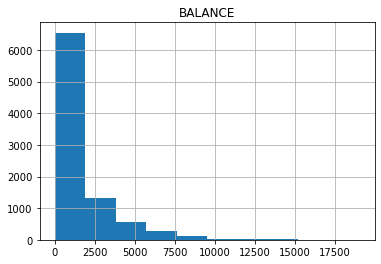

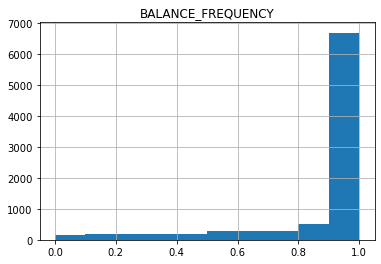

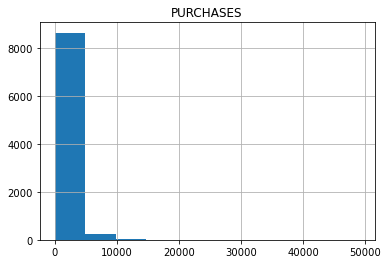

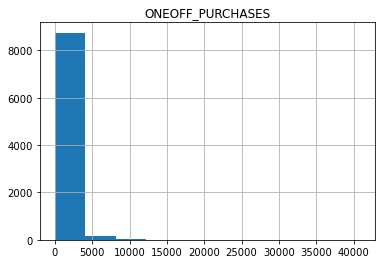

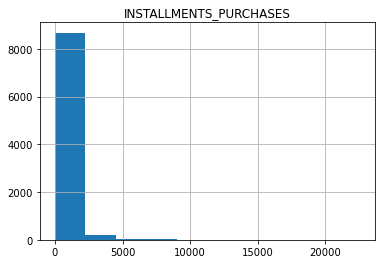

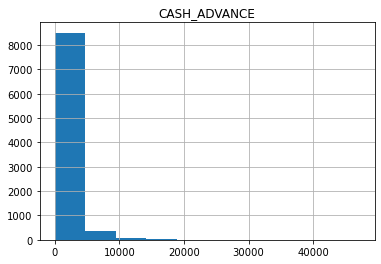

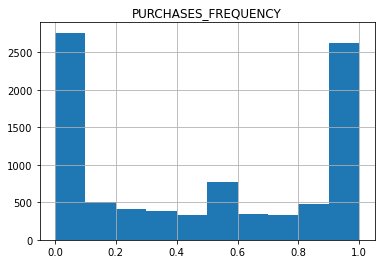

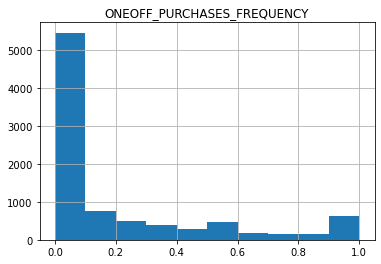

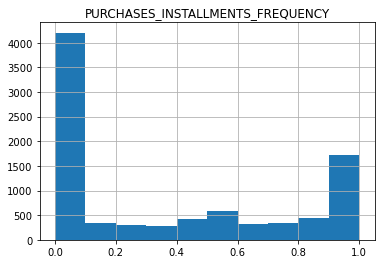

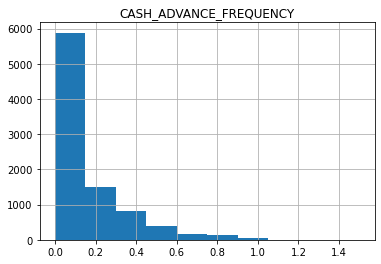

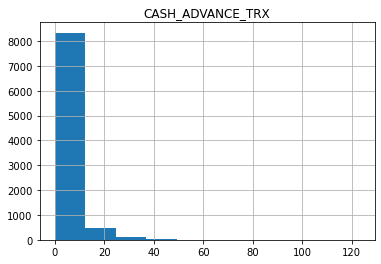

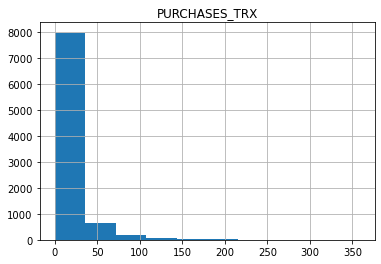

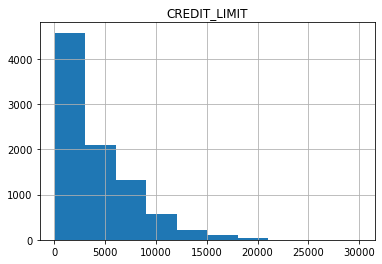

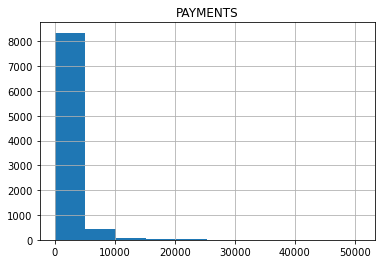

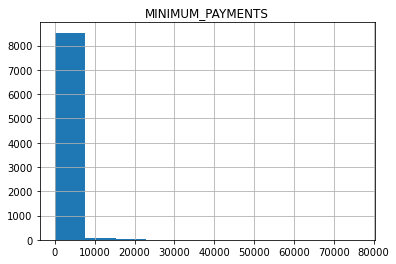

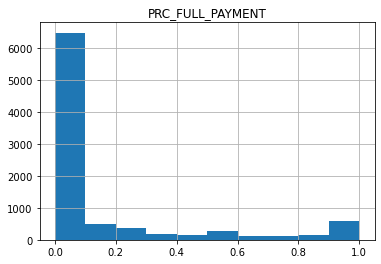

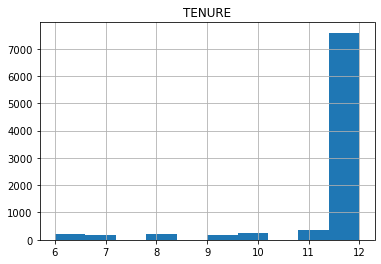

In [8]:
# EDA Visualization
for col in df:
    df[[col]].hist()

<AxesSubplot:>

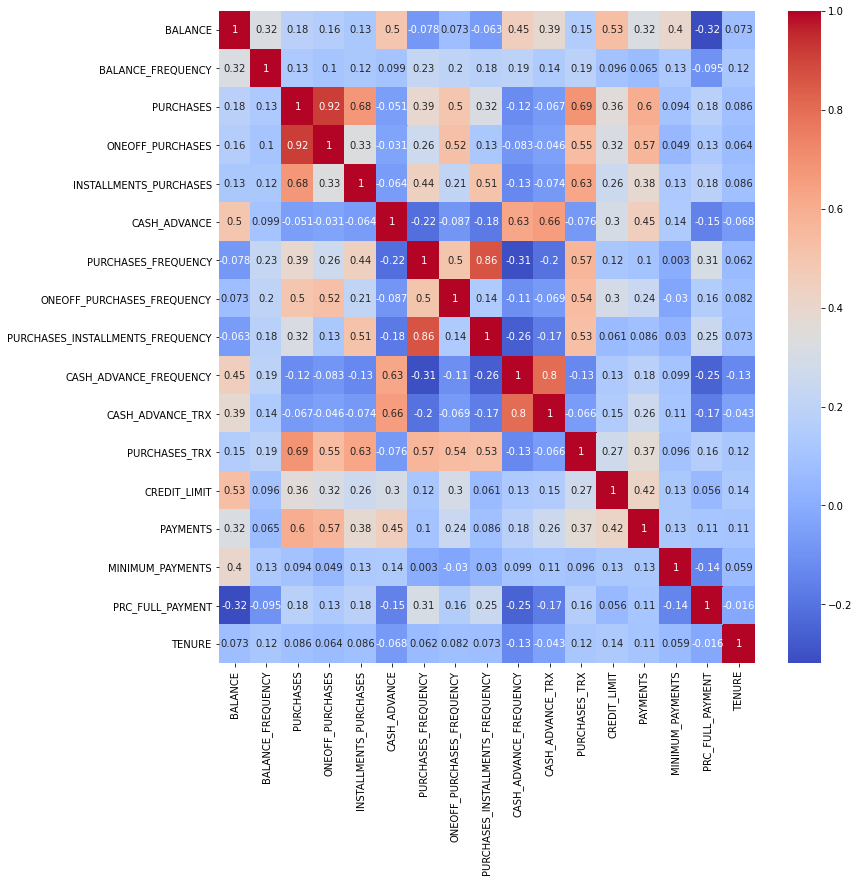

In [9]:
# Plotting correlation heatmap to see co-related features
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## IV. Data Preprocessing


### Handling Missing Values

In [10]:
# Check missing values
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
# Fill the missing values at the column MINIMUM_PAYMENTS with mean
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(value=df['MINIMUM_PAYMENTS'].mean())
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [12]:
# Fill the missing values at the column CREDIT_LIMIT with mean
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(value=df['CREDIT_LIMIT'].mean())
df.head() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


###  Feature Transformation 
###  1. Scaling

Before i apply dimensionality reduction techniques to the data, i need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.


In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-5.366135e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


### 2. Perform Dimensionality Reduction

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [14]:
# function to use pca
def use_pca(data, n_component=None):
    pca = PCA(n_components=n_component)
    pc_data = pca.fit_transform(data)
    pca.feat_name = data.columns
    
    return pca, pc_data

In [15]:
# Apply PCA to the data.

pca, df_pca = use_pca(df_scaled)

In [16]:
# function for plot explained variance ratio of pca
def scree_plot(pca):
    var = pca.explained_variance_ratio_
    cum_var = np.cumsum(var)
    num_components = len(pca.explained_variance_ratio_)
    plt.figure(figsize=(20, 10))
    plt.bar(range(num_components), var)
    plt.plot(range(num_components), cum_var)
    plt.show()

Amount of explained variance for each component:
[5. 3. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]

With ratio:
[0.273 0.203 0.088 0.075 0.063 0.058 0.049 0.043 0.038 0.031 0.024 0.018
 0.014 0.012 0.01  0.003 0.   ]


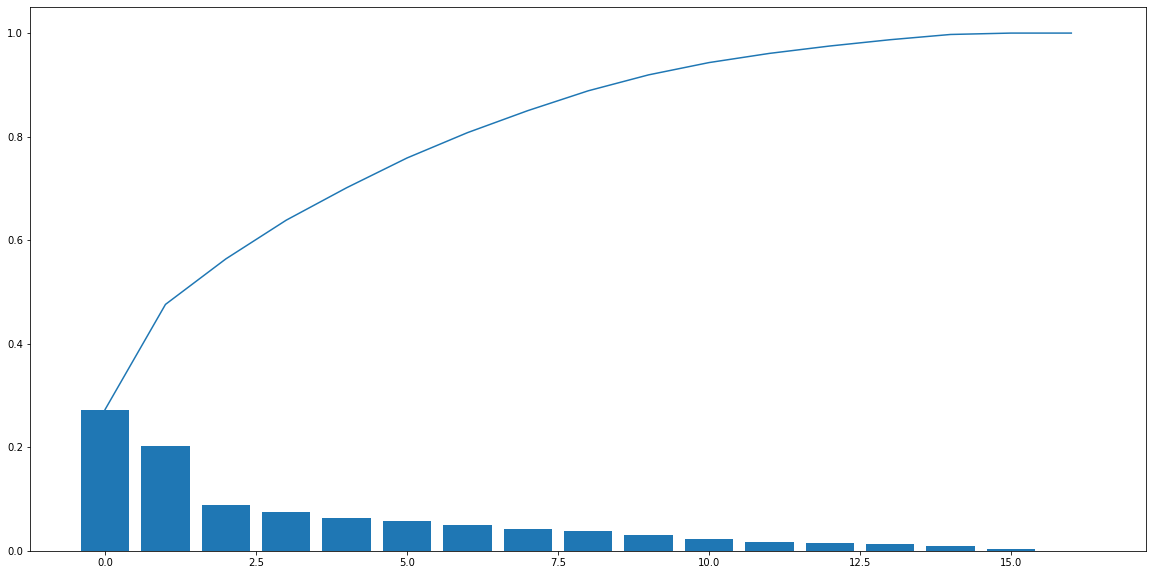

In [17]:
# Investigate the variance accounted for by each principal component.

print('Amount of explained variance for each component:\n{}'.format(np.round(pca.explained_variance_)))
print('\nWith ratio:\n{}'.format(np.round(pca.explained_variance_ratio_, decimals=3)))

# plot variability of explained variance for each component
scree_plot(pca)

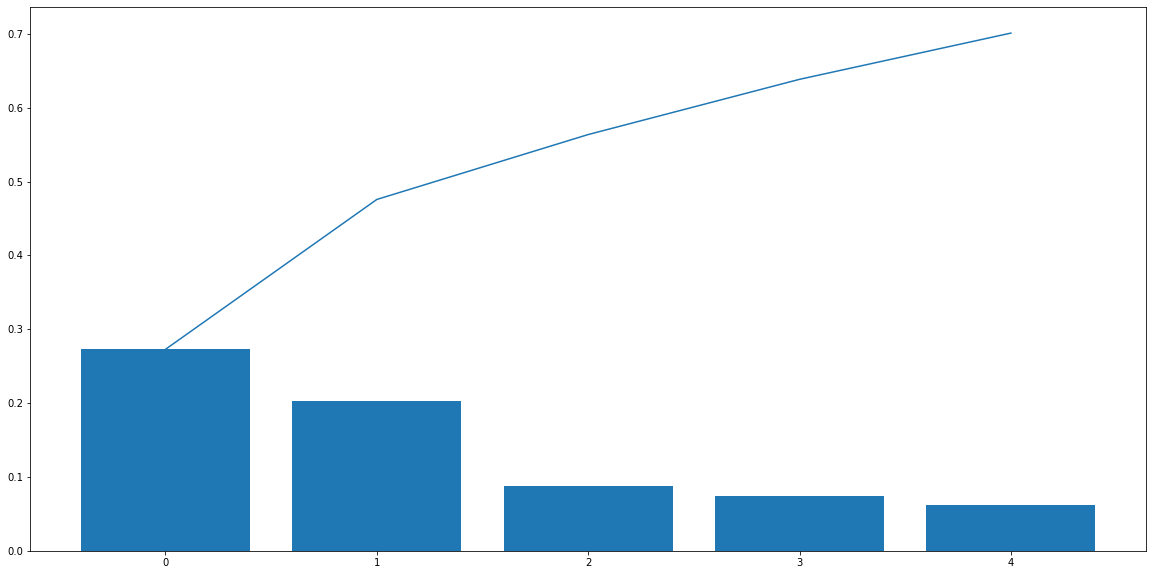

In [18]:
# Re-apply PCA to the data while selecting for number of components to retain.

pca, pc_df = use_pca(df_scaled, n_component=5)
scree_plot(pca)

### Clustering

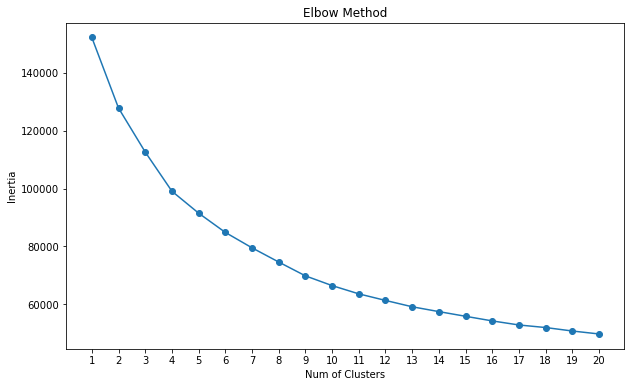

In [19]:
# Over a number of different cluster counts...

inertia = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), inertia)
plt.scatter(range(1, 21), inertia)
plt.title("Elbow Method")
plt.xticks(range(1, 21))
plt.xlabel("Num of Clusters")
plt.ylabel("Inertia")
plt.show()
    

In [20]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_scaled)
print('centroids:', kmeans.cluster_centers_)

clusters = kmeans.predict(df_scaled)
df['clusters'] = clusters
df.head(10)

centroids: [[-0.39732542  0.30832309 -0.06798201 -0.24522314  0.28974218 -0.36685869
   0.96393743 -0.37720019  1.13866473 -0.46418493 -0.35876227  0.12145788
  -0.32993724 -0.25236853 -0.0548613   0.34030906 -0.0251662 ]
 [ 0.14086333  0.42734447  0.92871322  0.8775808   0.58361785 -0.30925197
   1.08781739  1.83698973  0.54386968 -0.40576335 -0.31847459  1.18399911
   0.69298414  0.37984089 -0.02300532  0.43443375  0.27157456]
 [-0.69808345 -2.12195727 -0.3129182  -0.23091847 -0.31555317 -0.30784787
  -0.55953232 -0.41850675 -0.4647188  -0.48568753 -0.35917666 -0.42561905
  -0.20907025 -0.22122484 -0.25609567  0.26217199 -0.16410052]
 [ 1.59397642  0.37670295 -0.20363236 -0.14834967 -0.20903513  1.95122838
  -0.44788948 -0.18265989 -0.40529825  1.90259986  1.85843051 -0.24329212
   0.96244075  0.77843212  0.5136878  -0.39115607 -0.09077867]
 [ 1.41094585  0.41337911  7.12780652  6.30097826  5.27490921  0.01008948
   1.08476749  1.88546037  1.03877408 -0.29490011 -0.11244365  4.742081

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,5
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,2


In [21]:
cluster_to_df = {}
for cluster in df.clusters.sort_values().unique():
    cluster_to_df[cluster] = df[df.clusters==cluster]

In [22]:
cluster_to_df.keys()

dict_keys([0, 1, 2, 3, 4, 5])

In [23]:
for cluster, df_cluster in cluster_to_df.items():
    print("Summary statistics of cluster-{}:".format(cluster))
    display(df_cluster.describe())

Summary statistics of cluster-0:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
count,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.0
mean,738.433679,0.950310,859.277602,186.173496,673.638969,211.658792,0.877524,0.090193,0.817196,0.042405,0.805020,17.745854,3294.383775,1005.110526,733.613272,0.253361,11.483640,0.0
std,1016.995725,0.110071,703.363780,366.233165,588.722298,608.902953,0.153199,0.144162,0.192250,0.101128,2.086491,11.946647,2638.466664,987.168707,2174.658451,0.342201,1.403895,0.0
min,0.734665,0.272727,12.000000,0.000000,0.000000,0.000000,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.261984,0.000000,6.000000,0.0
25%,63.021974,1.000000,348.475000,0.000000,280.125000,0.000000,0.750000,0.000000,0.666667,0.000000,0.000000,11.000000,1500.000000,363.094933,153.267991,0.000000,12.000000,0.0
50%,259.159820,1.000000,620.640000,0.000000,485.370000,0.000000,0.916667,0.000000,0.875000,0.000000,0.000000,13.000000,2500.000000,701.251972,187.935300,0.083333,12.000000,0.0
75%,1092.157590,1.000000,1180.165000,214.855000,863.020000,0.000000,1.000000,0.166667,1.000000,0.000000,0.000000,22.000000,4500.000000,1324.708054,570.348459,0.454545,12.000000,0.0
max,6991.964344,1.000000,4709.140000,3227.850000,4313.220000,5716.149236,1.000000,0.888889,1.000000,0.714286,16.000000,111.000000,18000.000000,9000.706634,38512.124770,1.000000,12.000000,0.0


Summary statistics of cluster-1:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
count,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.0
mean,1857.279485,0.978488,2987.977757,2049.665687,938.765242,330.432245,0.926889,0.750719,0.580268,0.053925,1.074773,44.141239,7018.955644,2833.319561,810.545404,0.280991,11.880665,1.0
std,2269.203007,0.072130,1976.102902,1661.884966,1118.320108,836.588663,0.130697,0.252855,0.392146,0.112623,2.583101,33.117768,4057.533406,2269.456962,1917.754436,0.376824,0.663909,0.0
min,1.198223,0.181818,8.400000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,4.000000,300.000000,0.000000,3.197940,0.000000,6.000000,1.0
25%,290.062800,1.000000,1514.450000,872.545000,104.397500,0.000000,0.916667,0.583333,0.166667,0.000000,0.000000,22.000000,4000.000000,1254.506592,183.690554,0.000000,12.000000,1.0
50%,914.429050,1.000000,2541.755000,1592.320000,599.635000,0.000000,1.000000,0.833333,0.666667,0.000000,0.000000,35.000000,6500.000000,2201.998520,293.875950,0.000000,12.000000,1.0
75%,2605.313352,1.000000,4042.842500,2707.917500,1377.047500,91.868791,1.000000,1.000000,1.000000,0.083333,1.000000,56.000000,9000.000000,3846.625034,864.206542,0.583333,12.000000,1.0
max,18495.558550,1.000000,11994.710000,11994.710000,7571.400000,7894.578816,1.000000,1.000000,1.000000,0.833333,23.000000,309.000000,30000.000000,19714.097280,50260.759470,1.000000,12.000000,1.0


Summary statistics of cluster-2:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.0
mean,111.971653,0.374694,334.395004,209.000465,125.620931,335.263311,0.265580,0.077550,0.179609,0.038210,0.807018,4.127384,3732.825243,1093.299450,267.574608,0.230220,11.295195,2.0
std,231.046577,0.195670,481.418461,449.557156,234.413942,846.220325,0.252021,0.126014,0.251207,0.075532,2.222401,4.533651,3201.564743,2332.453451,321.563451,0.346547,1.586383,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.019163,0.000000,6.000000,2.0
25%,7.098261,0.200000,37.650000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,151.816999,79.298269,0.000000,12.000000,2.0
50%,25.715061,0.363636,158.370000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,3.000000,3000.000000,382.210790,132.441551,0.000000,12.000000,2.0
75%,94.876216,0.545455,426.540000,193.400000,163.300000,85.709192,0.416667,0.083333,0.333333,0.083333,1.000000,6.000000,5000.000000,1038.737551,242.712758,0.363636,12.000000,2.0
max,2075.637866,0.833333,3950.000000,3950.000000,3011.360000,6897.966615,1.000000,1.000000,1.000000,0.500000,24.000000,36.000000,23000.000000,29272.486070,3116.679110,1.000000,12.000000,2.0


Summary statistics of cluster-3:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
count,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.0
mean,4877.004640,0.966578,566.960000,345.487536,221.578150,5067.584105,0.309945,0.147659,0.202939,0.515581,15.910603,8.644491,8001.408051,3981.946723,2058.187456,0.039313,11.397089,3.0
std,2838.411307,0.094353,1000.704552,703.681019,515.929074,3804.558847,0.364544,0.234477,0.325590,0.230262,13.192733,16.027046,3711.666963,4731.152127,3978.411097,0.110955,1.469889,0.0
min,78.114579,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,16.950090,0.000000,6.000000,3.0
25%,2705.057392,1.000000,0.000000,0.000000,0.000000,2782.023097,0.000000,0.000000,0.000000,0.333333,8.000000,0.000000,5500.000000,1330.887998,827.194682,0.000000,12.000000,3.0
50%,4657.639065,1.000000,124.120000,0.000000,0.000000,4171.189422,0.090909,0.000000,0.000000,0.500000,13.000000,2.000000,7500.000000,2217.329705,1401.609752,0.000000,12.000000,3.0
75%,6631.103841,1.000000,728.065000,360.000000,186.675000,6214.531672,0.583333,0.181818,0.333333,0.666667,20.000000,11.000000,10000.000000,4890.638473,2148.889042,0.000000,12.000000,3.0
max,16304.889250,1.000000,8533.540000,6678.260000,5105.980000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,142.000000,19600.000000,40627.595240,61031.618600,1.000000,12.000000,3.0


Summary statistics of cluster-4:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0
mean,4501.239524,0.975196,16231.873333,11050.770741,5181.102593,1000.029225,0.925720,0.764927,0.777273,0.076132,2.481481,132.580247,12375.308642,15933.142123,3428.812651,0.401597,11.962963,4.0
std,3960.390410,0.095444,8777.290161,9110.509509,4461.815081,3241.312053,0.182118,0.306669,0.325871,0.193738,7.750986,80.966639,5386.639278,9753.660062,9117.079514,0.414885,0.247207,0.0
min,348.342172,0.272727,7739.480000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,3.000000,2800.000000,2688.447014,156.683560,0.000000,10.000000,4.0
25%,1377.812538,1.000000,10709.170000,4503.310000,1591.660000,0.000000,1.000000,0.583333,0.583333,0.000000,0.000000,79.000000,8500.000000,9423.715495,340.717801,0.000000,12.000000,4.0
50%,2997.977825,1.000000,12375.000000,9689.360000,4266.940000,0.000000,1.000000,0.916667,0.916667,0.000000,0.000000,122.000000,12000.000000,12080.201430,767.014180,0.250000,12.000000,4.0
75%,6372.182817,1.000000,20747.340000,14215.000000,7703.260000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,176.000000,16500.000000,20343.286810,2465.465414,0.875000,12.000000,4.0
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,19513.474830,1.000000,1.000000,1.000000,1.000000,48.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4.0


Summary statistics of cluster-5:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
count,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.0
mean,1543.075446,0.965423,265.361154,220.892134,44.631756,807.512306,0.158617,0.102318,0.058080,0.161555,3.055903,3.009865,3284.763784,974.478117,794.572431,0.021801,11.505755,5.0
std,1273.513712,0.081567,474.154730,448.785289,135.264689,1047.003858,0.197745,0.161043,0.123832,0.157597,3.533044,4.825634,2464.429747,1072.942577,1698.779400,0.062718,1.332803,0.0
min,0.488050,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,5.038210,0.000000,6.000000,5.0
25%,662.022698,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,341.431225,237.276808,0.000000,12.000000,5.0
50%,1222.050009,1.000000,46.740000,0.000000,0.000000,346.333741,0.083333,0.000000,0.000000,0.125000,2.000000,1.000000,2500.000000,610.491342,428.353499,0.000000,12.000000,5.0
75%,2063.855487,1.000000,339.750000,238.970000,0.000000,1279.629012,0.272727,0.166667,0.000000,0.250000,5.000000,5.000000,4500.000000,1169.235129,772.859860,0.000000,12.000000,5.0
max,9335.314170,1.000000,4900.000000,4900.000000,3000.000000,6479.639793,0.857143,0.833333,0.666667,0.900000,31.000000,54.000000,16500.000000,9614.697558,28483.254830,0.666667,12.000000,5.0


In [24]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


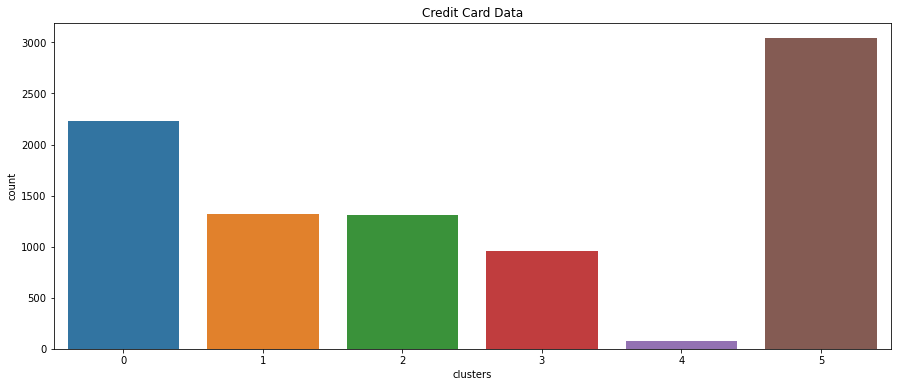

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(x='clusters', data=df)
plt.title('Credit Card Data')
plt.show()

### Compare the number of balance from cluster 0 to 5

In [26]:
# Grouping the cluster
cluster_0_5 = df[(df.clusters>=0) & (df.clusters<=5)]

In [27]:
cluster_balance = cluster_0_5.groupby('clusters')['BALANCE'].sum()
cluster_balance

clusters
0    1.647446e+06
1    2.459038e+06
2    1.467948e+05
3    4.691678e+06
4    3.646004e+05
5    4.692492e+06
Name: BALANCE, dtype: float64

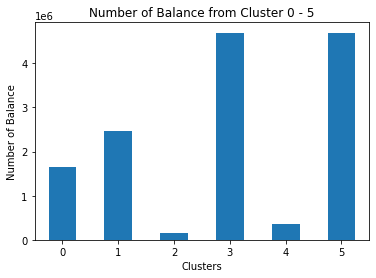

In [28]:
cluster_balance.plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Number of Balance')
plt.title('Number of Balance from Cluster 0 - 5')
plt.xticks(rotation=0)
plt.show()

### Compare the number of balance frequency from cluster 0 to 5

In [29]:
cluster_balance_frequency = cluster_0_5.groupby('clusters')['BALANCE_FREQUENCY'].sum()
cluster_balance_frequency

clusters
0    2120.140761
1    1295.518708
2     491.224218
3     929.847849
4      78.990910
5    2935.850548
Name: BALANCE_FREQUENCY, dtype: float64

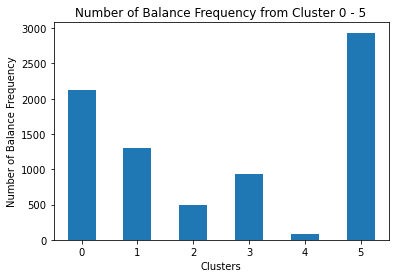

In [30]:
cluster_balance_frequency.plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Number of Balance Frequency')
plt.title('Number of Balance Frequency from Cluster 0 - 5')
plt.xticks(rotation=0)
plt.show()

### Compare the number of purchases from cluster 0 to 5

In [31]:
cluster_purchases = cluster_0_5.groupby('clusters')['PURCHASES'].sum()
cluster_purchases

clusters
0    1917048.33
1    3956082.55
2     438391.85
3     545415.52
4    1314781.74
5     806963.27
Name: PURCHASES, dtype: float64

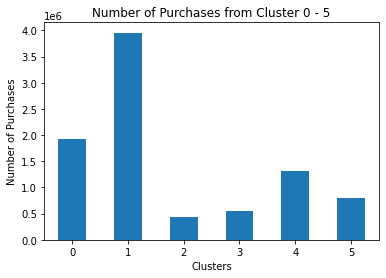

In [32]:
cluster_purchases.plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases from Cluster 0 - 5')
plt.xticks(rotation=0)
plt.show()

### Compare the number of purchases frequency from cluster 0 to 5

In [33]:
cluster_purchases_frequency = cluster_0_5.groupby('clusters')['PURCHASES_FREQUENCY'].sum()
cluster_purchases_frequency

clusters
0    1957.756134
1    1227.201111
2     348.175981
3     298.167222
4      74.983333
5     482.353627
Name: PURCHASES_FREQUENCY, dtype: float64

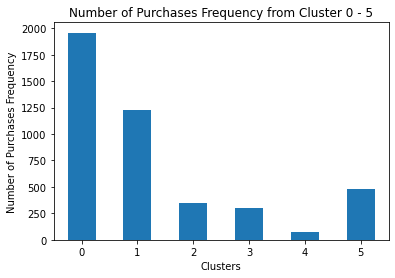

In [34]:
cluster_purchases_frequency.plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Number of Purchases Frequency')
plt.title('Number of Purchases Frequency from Cluster 0 - 5')
plt.xticks(rotation=0)
plt.show()

### Compare the number of payments from cluster 0 to 5

In [35]:
cluster_payments = cluster_0_5.groupby('clusters')['PAYMENTS'].sum()
cluster_payments

clusters
0    2.242402e+06
1    3.751315e+06
2    1.433316e+06
3    3.830633e+06
4    1.290585e+06
5    2.963388e+06
Name: PAYMENTS, dtype: float64

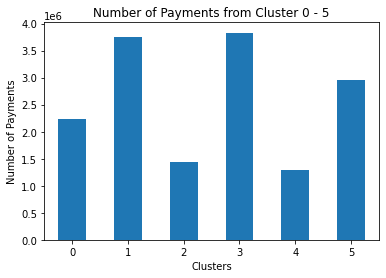

In [36]:
cluster_payments.plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Number of Payments')
plt.title('Number of Payments from Cluster 0 - 5')
plt.xticks(rotation=0)
plt.show()

### Compare the number of minimum payments from cluster 0 to 5

In [37]:
cluster_minimum_payments = cluster_0_5.groupby('clusters')['MINIMUM_PAYMENTS'].sum()
cluster_minimum_payments

clusters
0    1.636691e+06
1    1.073162e+06
2    3.507903e+05
3    1.979976e+06
4    2.777338e+05
5    2.416295e+06
Name: MINIMUM_PAYMENTS, dtype: float64

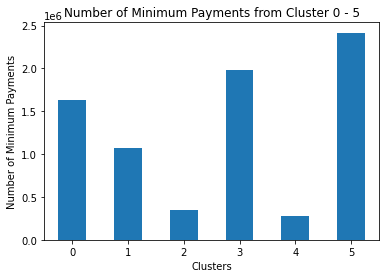

In [38]:
cluster_minimum_payments.plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Number of Minimum Payments')
plt.title('Number of Minimum Payments from Cluster 0 - 5')
plt.xticks(rotation=0)
plt.show()

## Review

From the Credit Card data :

- Cluster 0 has the highest number of customers
- Cluster 3 has the lowest number of customers

From the Balance and the Balance Frequency feature :

- Cluster 0 became the most followed by cluster 4, cluster 2 and cluster 5.

From the Purchases and the Purchases Frequency feature :

- Cluster 2 became the largest followed by cluster 5, cluster 3 and cluster 0.

From the Payments and the Minimum Payments feature :

- Cluster 4 is the largest, followed by cluster 2 and cluster 0.


## Conclusion

 - There needs to be positive stimulation for customers who are in cluster 0 so that they can contribute more to the use of credit cards, such as rewards.
 
 - For clusters 2, 4 and 5, it is still being monitored whether there is an increase in the future.